In [1]:
import pandas as pd
adv=pd.read_csv(r"D:\Data Science\tvmarketing.csv") # r is given to tell its a raw string, not consider \ as escape sequence

In [13]:
adv

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9
...,...,...
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5


In [14]:
adv.head(10)

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9
5,8.7,7.2
6,57.5,11.8
7,120.2,13.2
8,8.6,4.8
9,199.8,10.6


In [15]:
adv.tail()

,TV,Sales
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5
199,232.1,13.4


In [16]:
adv.info() # provides information about the data
"""
for this data -- O/P
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Sales   200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB"""

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Sales   200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


'\nfor this data -- O/P\nRangeIndex: 200 entries, 0 to 199\nData columns (total 2 columns):\n #   Column  Non-Null Count  Dtype  \n---  ------  --------------  -----  \n 0   TV      200 non-null    float64\n 1   Sales   200 non-null    float64\ndtypes: float64(2)\nmemory usage: 3.3 KB'

In [17]:
adv.shape # gives as the shape of the dataframe i.e is 200rows and 2 columns
#o/p
#(200, 2)

(200, 2)

In [18]:
adv.describe() #return summary statistics of all the numeric columns in the DataFrame

,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


'\ny=mx1+....+c or y = β₀ + β₁x\ny=the predicted value (dependent variable)\nx = the feature/input (independent variable)\n\nβ₁ (or m) = slope of the line → how much y changes for a unit change in x\n\nβ₀ (or c) = intercept → value of y when x = 0\n\nin this case\ny=c+m1*TV\n'

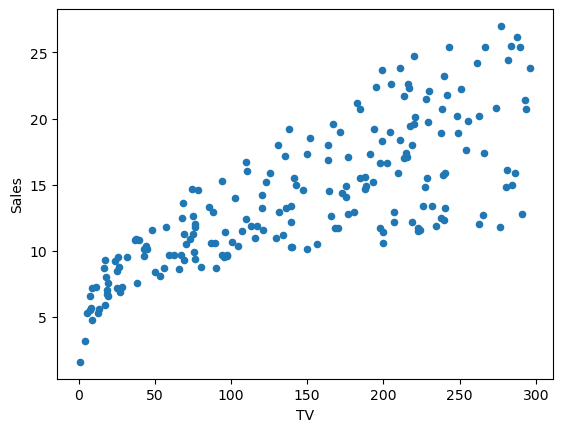

In [19]:
# Visualise the relationship between the features and the response using scatterplots
adv.plot(x='TV',y='Sales',kind='scatter')

"""
y=mx1+....+c or y = β₀ + β₁x
y=the predicted value (dependent variable)
x = the feature/input (independent variable)

β₁ (or m) = slope of the line → how much y changes for a unit change in x

β₀ (or c) = intercept → value of y when x = 0

in this case
y=c+m1*TV
"""

In [2]:
x=adv['TV']
y=adv['Sales']
y.head()


0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

In [21]:
x.tail()

195     38.2
196     94.2
197    177.0
198    283.6
199    232.1
Name: TV, dtype: float64

In [3]:
from sklearn.model_selection import train_test_split
#train_test_split is func to split data in to training set and test set
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.8 , random_state=0000)
"""
X	Features (independent variables)
y	Target variable (what you're predicting)
test_size=0.2	20% of data goes to testing, 80% to training
random_state=42	Sets the seed so you get the same split every time (optional but good for reproducibility)
Each different number will give you a different shuffle/split of the dataset.
"""
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [4]:
import numpy as np
X_train=np.array(X_train).reshape(160,1)#converting this in to a numpy array because scikit learn can only process that 
X_test=np.array(X_test).reshape(40,1)
# y_train=np.array(y_train).reshape(160,1)#converting this in to a numpy array because scikit learn can only process that 
# y_test=np.array(y_test).reshape(40,1)
# print(y_te.shape)


In [5]:
# import LinearRegression from sklearn
from sklearn.linear_model import LinearRegression

# Representing LinearRegression as lr(Creating LinearRegression Object)
lr = LinearRegression()

# Fit the model using lr.fit()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
train_test_split  


<function sklearn.model_selection._split.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)>

In [ ]:
print(lr.intercept_)#y=mx+c, c=intercept_ 
print(lr.coef_)# x=coef
# print(X_test.ndim) 

7.2924937735593645
[0.04600779]


In [6]:
y_pred = lr.predict(X_test)
# type(y_pred)
print(y_pred.shape) 

(40,)


Text(0, 0.5, 'Sales')

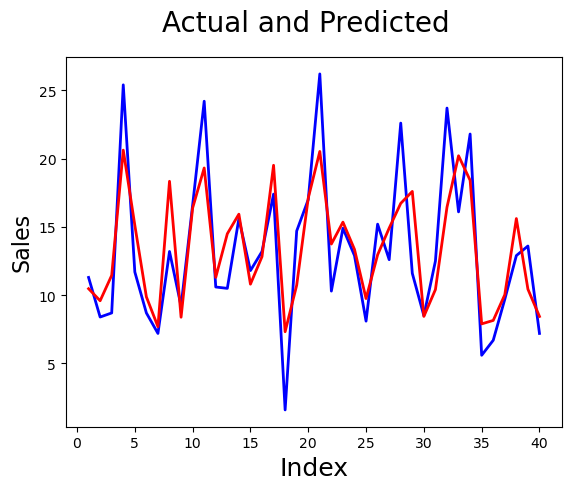

In [8]:
import matplotlib.pyplot as plt
c = [i for i in range(1,41,1)]         # generating index 
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2, linestyle="-")
plt.plot(c,y_pred, color="red",  linewidth=2, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Sales', fontsize=16) 

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)


In [ ]:
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R2 Score:", r_squared)

Mean Squared Error: 10.18618193453022
Root Mean Squared Error: 3.191579849311344
R2 Score: 0.6763151577939721


'\nif it was 100% correct it should have gven a straight line\n'

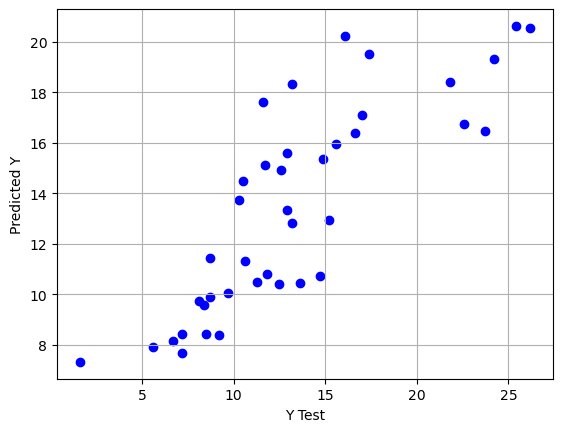

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred,c='blue')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.grid()
"""
if it was 100% correct it should have gven a straight line
"""